In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
from thinkdsp import read_wave

wave = read_wave('499400__danlucaz__happy-loop-1.wav')
wave.normalize()
wave.make_audio()

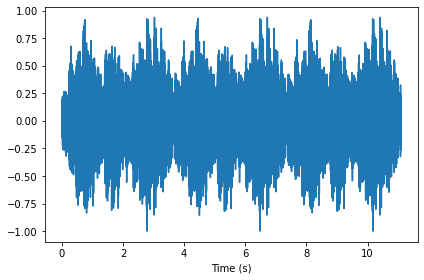

In [3]:
from thinkdsp import decorate

wave.plot()
decorate(xlabel='Time (s)')

In [4]:
segment = wave.segment(start=1.0, duration=0.5)
segment.make_audio()

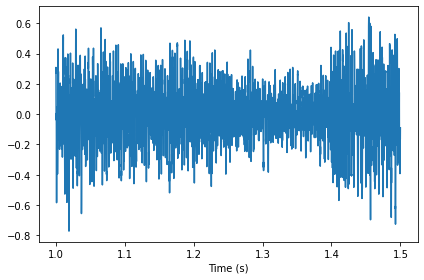

In [5]:
segment.plot()
decorate(xlabel='Time (s)')

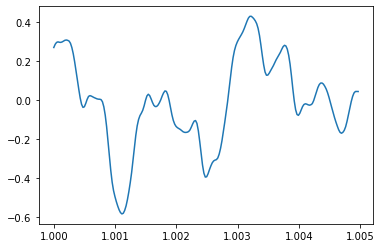

In [6]:
segment.segment(start=1.0, duration=0.005).plot()

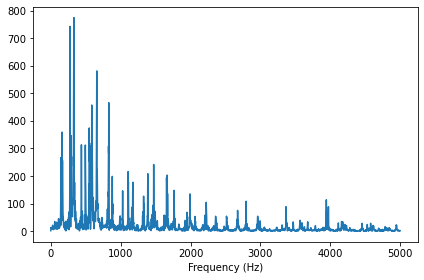

In [7]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

In [8]:
spectrum.high_pass(cutoff=1000, factor=0.01)
spectrum.make_wave().make_audio()

In [9]:
spectrum.low_pass(cutoff=2000, factor=0.01)
spectrum.make_wave().make_audio()

In [10]:
spectrum.band_stop(low_cutoff=1000,high_cutoff=2000)
spectrum.make_wave().make_audio()

In [11]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [12]:
from ipywidgets import interact, fixed

wave = read_wave('499400__danlucaz__happy-loop-1.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 10, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=5.0, description='start', max=10.0), FloatSlider(value=2.0, descriptio…